In [131]:
import pandas as pd
import seaborn as sns


In [132]:
data=pd.read_csv('insurance.csv')

In [133]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [134]:
data['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [135]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [136]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [138]:
data.sex.value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [139]:
data.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [140]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [141]:
#Encoding for the ease to use data
data['sex']=data['sex'].apply(lambda x:1 if x == 'male' else 0)
data['smoker']=data['smoker'].apply(lambda x:1 if x == 'yes' else 0)

In [142]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
5,31,0,25.740,0,0,southeast,3756.62160
6,46,0,33.440,1,0,southeast,8240.58960
7,37,0,27.740,3,0,northwest,7281.50560
8,37,1,29.830,2,0,northeast,6406.41070
9,60,0,25.840,0,0,northwest,28923.13692


In [143]:
# region needs to be encoded using one-hot encoding as there is no specific order to be followed
#here i convert into binary features

data=data.join(pd.get_dummies(data['region'],dtype=int)).drop('region',axis=1)

In [144]:
data.head(10)

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
5,31,0,25.740,0,0,3756.62160,0,0,1,0
6,46,0,33.440,1,0,8240.58960,0,0,1,0
7,37,0,27.740,3,0,7281.50560,0,1,0,0
8,37,1,29.830,2,0,6406.41070,1,0,0,0
9,60,0,25.840,0,0,28923.13692,0,1,0,0


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'charges'}>],
       [<Axes: title={'center': 'northeast'}>,
        <Axes: title={'center': 'northwest'}>,
        <Axes: title={'center': 'southeast'}>],
       [<Axes: title={'center': 'southwest'}>, <Axes: >, <Axes: >]],
      dtype=object)

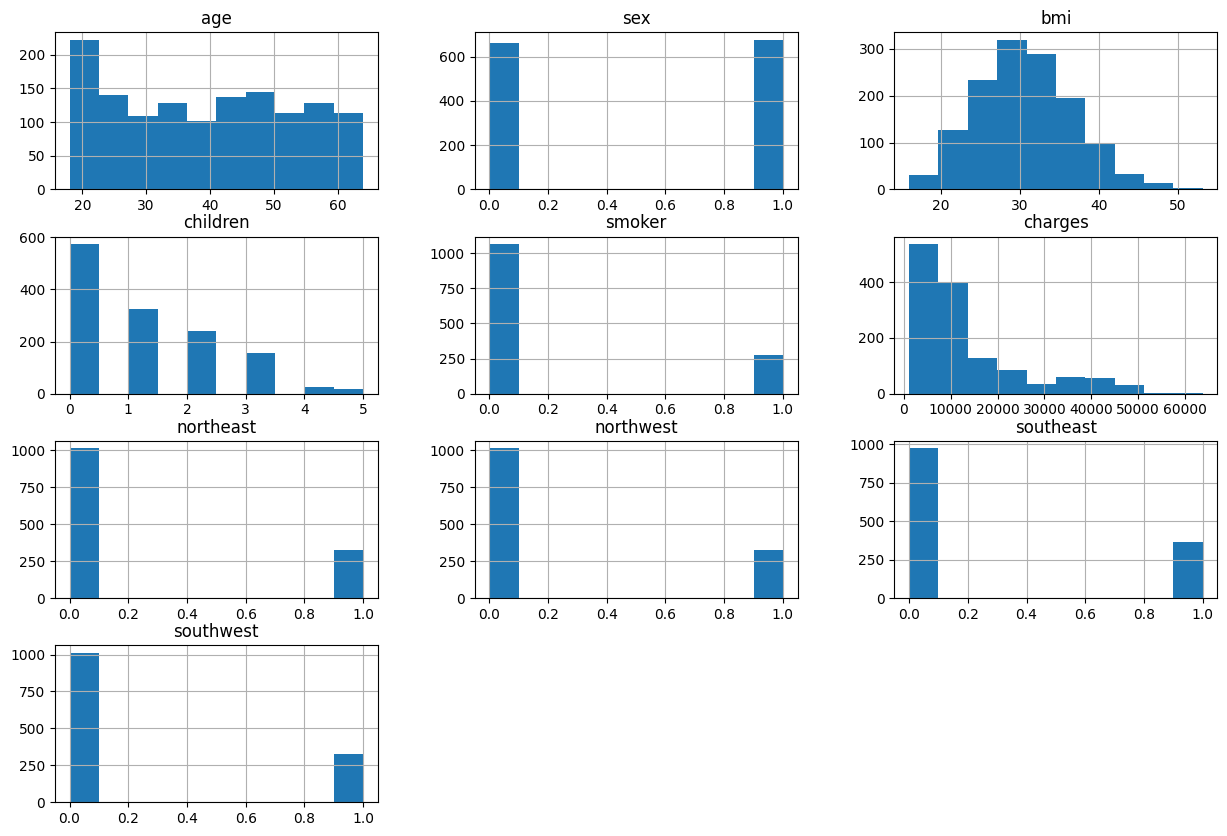

In [145]:
data.hist(figsize=(15,10))

<Axes: >

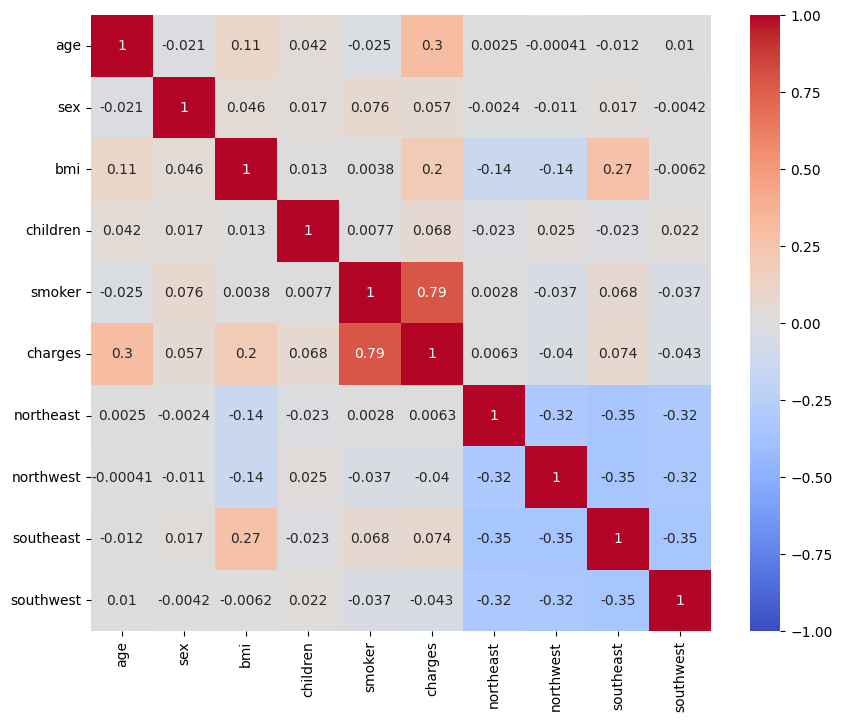

In [146]:
# lets look at correlations among features

import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm',vmin=-1,vmax=1)

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error

X=data.drop('charges',axis=1)
y=data['charges']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [148]:
model=RandomForestRegressor(n_jobs=-1) # i am using all the cpu cores
model.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [149]:
model.score(X_test,y_test)

0.8656243904193659

In [150]:
y_pred=model.predict(X_test)
rmse=root_mean_squared_error(y_test,y_pred)
rmse

4567.45475410838

In [151]:
data.charges.std()

np.float64(12110.011236694001)

In [152]:
y_test.std()

np.float64(12483.196201893314)

In [153]:
data.charges.median()

np.float64(9382.033)

In [154]:
mae=mean_absolute_error(y_pred,y_test)
mae

2504.2226057269595

Text(0.5, 1.0, 'prediction vs charges')

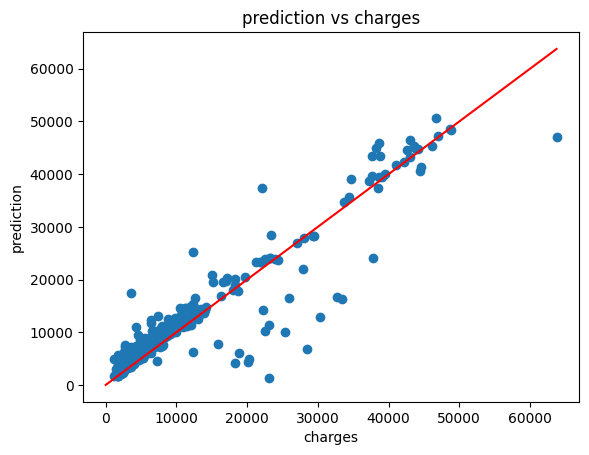

In [155]:
import numpy as np 
plt.scatter(y_test,y_pred)
plt.plot(np.linspace(0,max(y_test)),np.linspace(0,max(y_test)),color='red')
plt.xlabel('charges')
plt.ylabel('prediction')
plt.title('prediction vs charges')

In [156]:
feature_importances=sorted(zip(model.feature_names_in_,model.feature_importances_),key=lambda x:x [1],reverse=True)
feature_importances

[('smoker', np.float64(0.6085395975932739)),
 ('bmi', np.float64(0.2116722977436914)),
 ('age', np.float64(0.1353359362790421)),
 ('children', np.float64(0.019854137690282696)),
 ('sex', np.float64(0.006583297782468996)),
 ('northeast', np.float64(0.005604854064726218)),
 ('northwest', np.float64(0.004883563105342028)),
 ('southeast', np.float64(0.0043363328286918626)),
 ('southwest', np.float64(0.0031899829124807976))]

Text(0.5, 1.0, 'feature_importances')

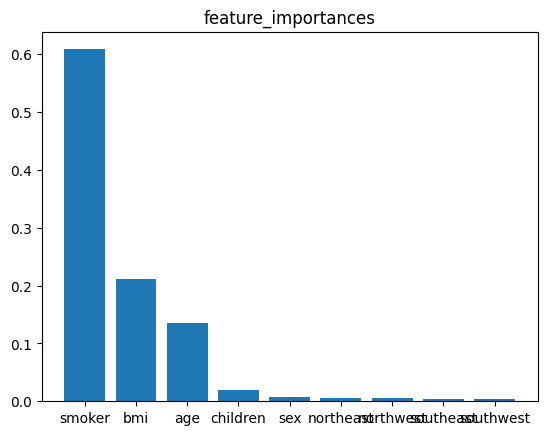

In [157]:
plt.Figure(figsize=(15,10))
plt.bar([x[0] for x in feature_importances],[x[1] for x in feature_importances])
plt.title('feature_importances')

In [158]:
# Hyperparameter tuning 

from sklearn.model_selection import GridSearchCV

param_grid={
    'max_depth':[None,2,5],
    'min_samples_split':[2,4,6,8],
    'min_samples_leaf':[1,2,4,6]
}

model=RandomForestRegressor(n_jobs=-1)

gridsearch = GridSearchCV(model,param_grid=param_grid,cv=5)


In [159]:
gridsearch.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'max_depth': [None, 2, 5],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 4, 6, 8]})

In [160]:
gridsearch.best_params_

{'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 4}

In [161]:
model=gridsearch.best_estimator_

In [162]:
model

RandomForestRegressor(max_depth=5, min_samples_leaf=6, min_samples_split=4,
                      n_jobs=-1)

In [163]:
model.score(X_test,y_test)

0.8804643228137868

In [166]:
y_pred=model.predict(X_test)

In [168]:
rmse=root_mean_squared_error(y_test,y_pred)
rmse

4307.8721256752415

In [170]:
mae=mean_absolute_error(y_test,y_pred)
mae

2450.7067358632844

Text(0.5, 1.0, 'prediction vs charges')

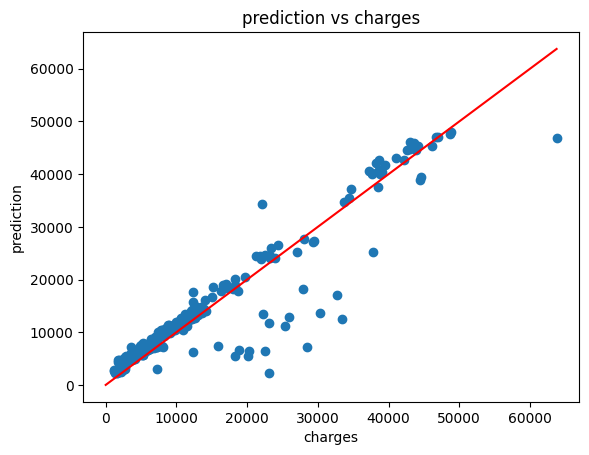

In [171]:
plt.scatter(y_test,y_pred)
plt.plot(np.linspace(0,max(y_test)),np.linspace(0,max(y_test)),color='red')
plt.xlabel('charges')
plt.ylabel('prediction')
plt.title('prediction vs charges')

In [165]:
#